# <Center> Computer Science Department
## <Center> CS660 – Mathematical Foundations of Analytics (CRN# 22921)
### <Center>Spring 2025
#### <Center>Project #1 / Due 27-Feb-2025
#### <Center>Exploratory Data Analysis (EDA) is a crucial step in any data science or machine learning project. It serves multiple purposes:

##### 1. Understanding the Data: EDA helps in getting a better understanding of the data, including its distribution, relationships, and patterns. It allows you to get a sense of the data's underlying structure, which is essential for making informed decisions in later stages.
##### 2. Data Cleaning: Through EDA, you can identify missing values, outliers, and inconsistencies in the data. Addressing these issues early on ensures the quality and reliability of the data.
##### 3. Hypothesis Generation: EDA helps in generating hypotheses about the data. By visually exploring the data, you can identify potential relationships and correlations that may not be immediately obvious.
##### 4. Feature Selection and Engineering: EDA aids in selecting the most relevant features and engineering new ones that could improve model performance. It helps in understanding which variables have the most predictive power.
##### 5. Model Selection: Understanding the data through EDA allows you to choose the most appropriate algorithms for your problem. For instance, if your data is not linearly separable, you might consider non-linear models.
##### 6. Risk Mitigation: EDA helps in identifying potential pitfalls and risks, such as data leakage or biased data, that could impact the model's performance.

Data Source: Electric Vehicle Population Data in Washington State, USA, available at
https://data.gov/
Data Name: EV_Population_WA_Data.csv (already uploaded into the portal)
Data Description: This CSV file contains 200,048 rows, each representing an electric
vehicle. The dataset includes the following columns: VIN, County, City, State, Postal
Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle
(CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID,
Vehicle Location, Electric Utility, and 2020 Census Tract.

### For this data analysis project, we'll be using the following dataset:
Data Source: Electric Vehicle Population Data in Washington State, USA, available at
https://data.gov/
Data Name: EV_Population_WA_Data.csv (already uploaded into the portal)
Data Description: This CSV file contains 200,048 rows, each representing an electric
vehicle. The dataset includes the following columns: VIN, County, City, State, Postal
Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle
(CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID,
Vehicle Location, Electric Utility, and 2020 Census Tract.

### Project Purpose:
The goal of this project is to create a Notebook (Jupyter, Colab) and become familiar
with the Pandas and Matplotlib/Seaborn/Plotly libraries.
Questions to be Answered:
1. Which car <b>manufacturers</b> are the most commonly used for EVs in Washington?
2. What are the <b>highest and lowest electric ranges</b> in this dataset, and which car
<b>makers and models</b> do they correspond to?
3. Is the <b>maximum electric range </b>value unique? If not, which cars share this range?
4. Is the <b>minimum electric range</b> value unique? If not, which cars share this range?
5. How does the <b>electric</b> range vary <b>between car makers and between models</b>?
6. Which are the top <b>5 cities</b> adopting EVs?
7. How does the EV adoption rate vary among car makers over the years?
8. Is there a correlation between the <b>electric range</b> and the <b>city </b>of an EV?
9. Which <b>county has the greatest</b> variety of <b> EV car models</b>?

## Step 1 
## Understand the Dataset Context

### Step 1.1
Objective Clarification: Define the purpose of the analysis and the questions you aim to answer.

The purpose of this analysis is to gain crucial insights of the Electric Vehicle Poplulation in Washington using Exploratory Data Analysis.
<br>Our aim will be to answer the following questions:
1. Which car <b>manufacturers</b> are the most commonly used for EVs in Washington?
2. What are the <b>highest and lowest electric ranges</b> in this dataset, and which car
<b>makers and models</b> do they correspond to?
3. Is the <b>maximum electric range </b>value unique? If not, which cars share this range?
4. Is the <b>minimum electric range</b> value unique? If not, which cars share this range?
5. How does the <b>electric</b> range vary <b>between car makers and between models</b>?
6. Which are the top <b>5 cities</b> adopting EVs?
7. How does the EV adoption rate vary among car makers over the years?
8. Is there a correlation between the <b>electric range</b> and the <b>city </b>of an EV?
9. Which <b>county has the greatest</b> variety of <b> EV car models</b>?

### Step 1.2
Data Source Identification: Determine the source of the data, its collection methods, and any relevant background information.

### Electric Vehicle Population Data in Washington State, USA (Dataset)
<br>Publisher: data.wa.gov
<br>Maintainer: Department of Licensing
<br>Source URL: https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
<br>Category: Transportation
<br>Public Access Leve: Public
<br>This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
<br>This CSV file contains 200,048 rows, each representing an electric vehicle. 
<br>The dataset includes the following columns: VIN, County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, and 2020 Census Tract.

## Step 2 
## Import Libraries and Load Data

### Step 2.1
Import Necessary Libraries: Load libraries such as pandas, numpy, matplotlib, seaborn, etc.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2.2
Load the Dataset: Load the dataset into a DataFrame using pandas (assume using Python).

In [175]:
#source_url="https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df=pd.read_csv("EV_Population_WA_Data.csv")

In [176]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200043,JTMAB3FVXR,Snohomish,Snohomish,WA,98290.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,44.0,262809249,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10
200044,7FCTGAAA7P,Pierce,Orting,WA,98360.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,2.0,252195450,POINT (-122.197791 47.0948565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
200045,1V2GNPE87P,Spokane,Spokane,WA,99201.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,3.0,227314790,POINT (-117.428902 47.658268),MODERN ELECTRIC WATER COMPANY,5.306300e+10
200046,1G1RD6E42E,Snohomish,Mountlake Terrace,WA,98043.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,32.0,170747377,POINT (-122.306706 47.792043),PUGET SOUND ENERGY INC,5.306105e+10


## Step 3
## Initial Data Inspection

### Step 3.1
View Data Structure: Use functions like .head(), .tail(), .info(), and .describe() to get a sense of the data structure, types, and summary statistics.


In [181]:
[df.columns]

[Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
        'Make', 'Model', 'Electric Vehicle Type',
        'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
        'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
        'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
       dtype='object')]

In [183]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


In [185]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
200043,JTMAB3FVXR,Snohomish,Snohomish,WA,98290.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,44.0,262809249,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10
200044,7FCTGAAA7P,Pierce,Orting,WA,98360.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,2.0,252195450,POINT (-122.197791 47.0948565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
200045,1V2GNPE87P,Spokane,Spokane,WA,99201.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,3.0,227314790,POINT (-117.428902 47.658268),MODERN ELECTRIC WATER COMPANY,5.306300e+10
200046,1G1RD6E42E,Snohomish,Mountlake Terrace,WA,98043.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,32.0,170747377,POINT (-122.306706 47.792043),PUGET SOUND ENERGY INC,5.306105e+10
200047,5YJ3E1EAXP,Kitsap,Bremerton,WA,98311.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,224663134,POINT (-122.636245 47.62806),PUGET SOUND ENERGY INC,5.303509e+10


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200048 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200048 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200048 non-null  int64  
 6   Make                                               200048 non-null  object 
 7   Model                                              200048 non-null  object 
 8   Electric Vehicle Type                              200048 non-null  object

In [189]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,200044.000000,200048.000000,200048.000000,200048.000000,199606.000000,2.000480e+05,2.000440e+05
mean,98176.178121,2020.871261,53.485279,947.551913,28.986063,2.262988e+08,5.297545e+10
std,2424.207811,2.994933,88.786301,7860.591091,14.908108,7.282433e+07,1.605628e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.904573e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.363396e+08,5.303303e+10
75%,98372.000000,2023.000000,53.000000,0.000000,42.000000,2.609659e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


### Step 3.2
Check Dimensions: Identify the number of rows and columns using .shape().

In [192]:
sp=df.shape
print(f"Number of Rows = {sp[0]} \nNumber of Columns = {sp[1]}")

Number of Rows = 200048 
Number of Columns = 17


### Step 3.3
Identify Missing Values: Use .isnull().sum() to check for missing values.

In [195]:
missing_vals=df.isnull().sum()
missing_vals

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
/var/folders/jh/r0k5kntd0nzgw4m5nxb7jncr0000gn/T/ipykernel_10023/2590708743.py:5: SyntaxWarning: invalid escape sequence '\F'
  plt.xlabel("Name of Column\Feature",fontsize=20)


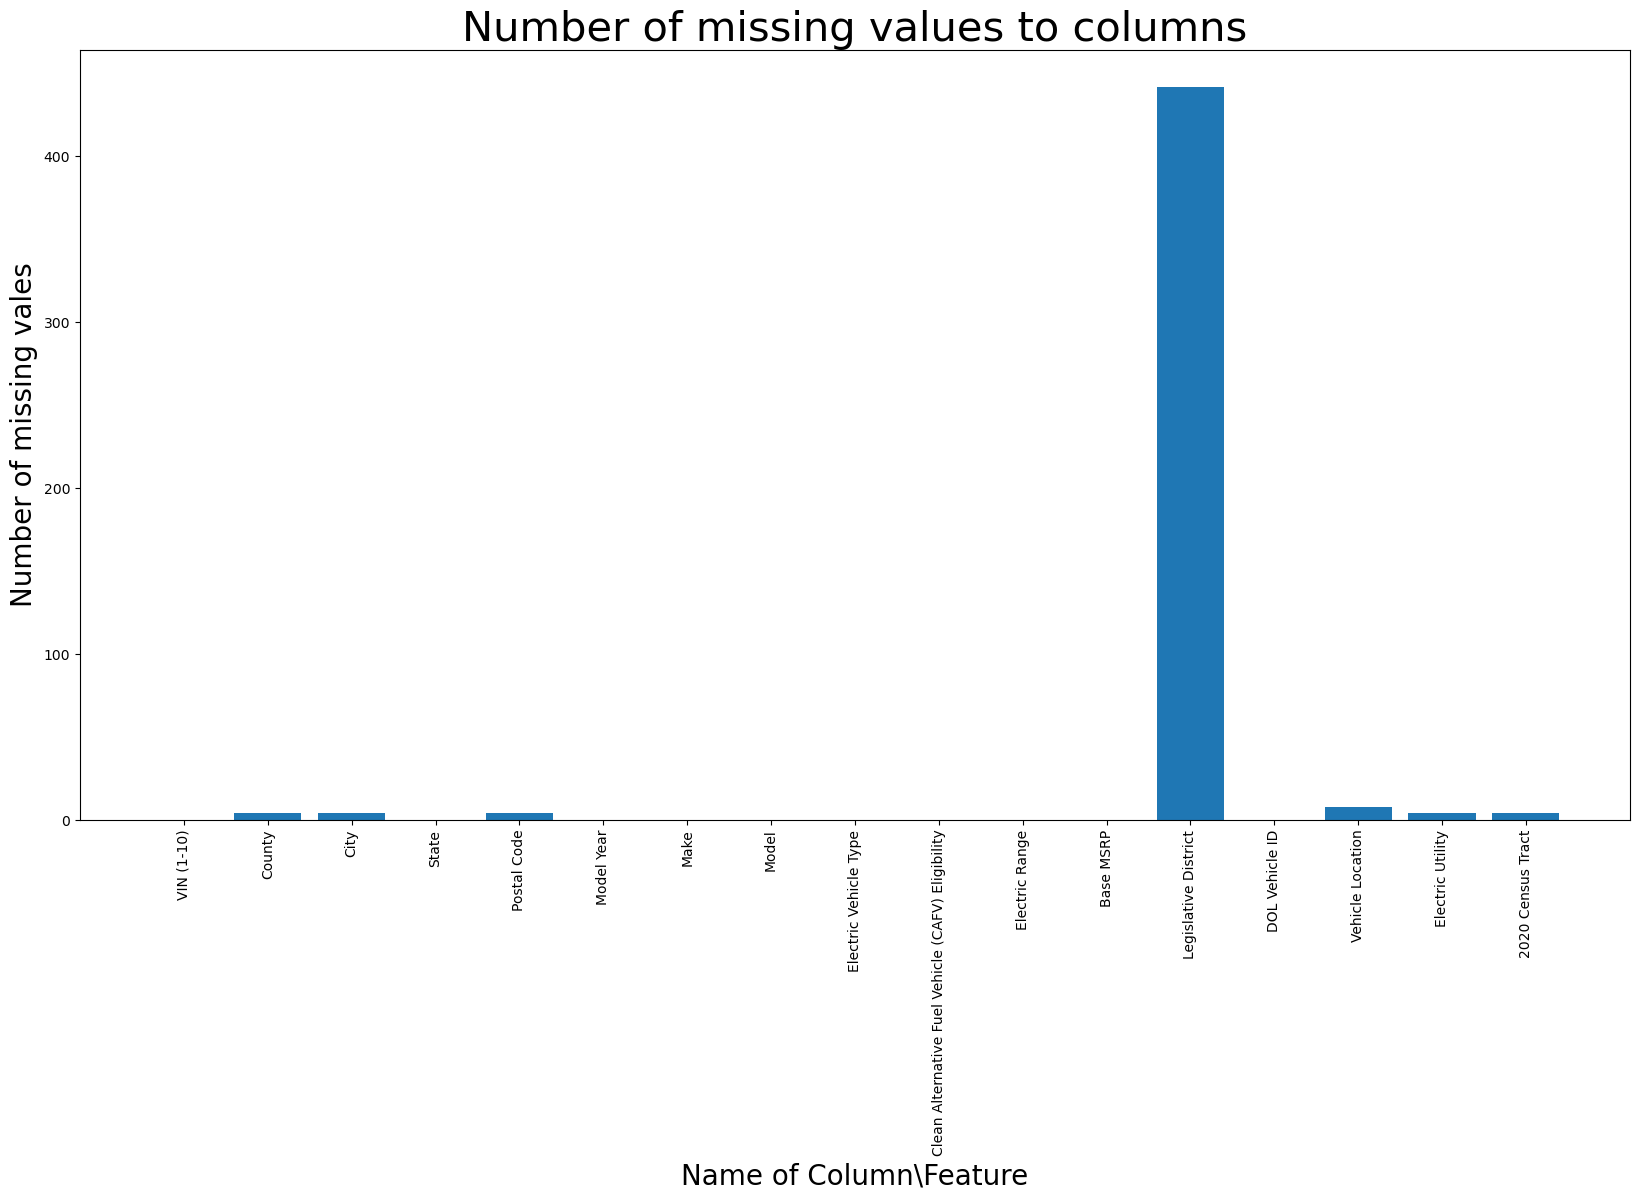

In [197]:
plt.figure(figsize=(20,10))
plt.bar(columns_df, missing_vals)
plt.title("Number of missing values to columns", fontsize=30)
plt.ylabel("Number of missing vales",fontsize=20)
plt.xlabel("Name of Column\Feature",fontsize=20)
plt.xticks(columns_df, rotation=90)
plt.show()

## Step 4 
## Data Cleaning
### Step 4.1
### Handle Missing Data:
Impute Missing Values: Fill missing values using strategies like mean, median, or mode imputation, or domain-specific methods.
<br>Remove Missing Values: Drop rows or columns with missing data if appropriate.

In [200]:
df.isnull().sum().sort_values(ascending=False)
# Targeting the Columns having 4 null values.

Legislative District                                 442
Vehicle Location                                       8
2020 Census Tract                                      4
City                                                   4
Electric Utility                                       4
Postal Code                                            4
County                                                 4
Electric Range                                         0
DOL Vehicle ID                                         0
Base MSRP                                              0
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Model                                                  0
Make                                                   0
Model Year                                             0
State                                                  0
Electric Vehicle Type                                  0
dtype: int64

In [204]:
# Need to create a function to make easy
display(df[df['2020 Census Tract'].isnull()])
display(df[df['City'].isnull()])
display(df[df['Electric Utility'].isnull()])
display(df[df['Postal Code'].isnull()])
display(df[df['County'].isnull()])

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
114,WBAJA9C50K,NaN,NaN,AE,NaN,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,53400,NaN,244582593,NaN,NaN,NaN
148234,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
157590,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
175158,1G1RB6S53J,NaN,NaN,BC,NaN,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,NaN,477613216,NaN,NaN,NaN


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
114,WBAJA9C50K,NaN,NaN,AE,NaN,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,53400,NaN,244582593,NaN,NaN,NaN
148234,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
157590,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
175158,1G1RB6S53J,NaN,NaN,BC,NaN,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,NaN,477613216,NaN,NaN,NaN


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
114,WBAJA9C50K,NaN,NaN,AE,NaN,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,53400,NaN,244582593,NaN,NaN,NaN
148234,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
157590,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
175158,1G1RB6S53J,NaN,NaN,BC,NaN,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,NaN,477613216,NaN,NaN,NaN


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
114,WBAJA9C50K,NaN,NaN,AE,NaN,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,53400,NaN,244582593,NaN,NaN,NaN
148234,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
157590,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
175158,1G1RB6S53J,NaN,NaN,BC,NaN,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,NaN,477613216,NaN,NaN,NaN


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
114,WBAJA9C50K,NaN,NaN,AE,NaN,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,53400,NaN,244582593,NaN,NaN,NaN
148234,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
157590,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
175158,1G1RB6S53J,NaN,NaN,BC,NaN,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,NaN,477613216,NaN,NaN,NaN


### We have 4 common rows for missing vlaues of County, City, Postal Code, Legislative District, Vehicle Location, Electric Utility, 2020 Census Tract, hence considering to remove those rows as we can not impute any of these details as all are related and we dont have any of the values for reference. Comparing 4 rows to 200000 rows it will not impact the data hence removed.


In [207]:
df = df.dropna(subset=['County'])

In [209]:
df.isnull().sum().sort_values(ascending=False)

Legislative District                                 438
Vehicle Location                                       4
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Utility                                       0
DOL Vehicle ID                                         0
Base MSRP                                              0
Electric Range                                         0
Electric Vehicle Type                                  0
County                                                 0
Model                                                  0
Make                                                   0
Model Year                                             0
Postal Code                                            0
State                                                  0
City                                                   0
2020 Census Tract                                      0
dtype: int64

In [211]:
df[df['Vehicle Location'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
130378,KNDJX3AE8H,Pacific,Long Beach,WA,98634.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,19.0,106442773,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
146036,KMHE54L2XH,Pacific,Long Beach,WA,98634.0,2017,HYUNDAI,SONATA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,0,19.0,245533578,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
181996,1C4JJXP69P,Pacific,Long Beach,WA,98634.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,19.0,254934886,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
192143,1G1FW6S08N,Pacific,Long Beach,WA,98634.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,218102209,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10


In [215]:
Test=df[(df['County']=='Pacific') & (df['City']=='Long Beach')]

In [217]:
Test['Vehicle Location'].unique()

array(['POINT (-124.035084 46.375408)', nan], dtype=object)

### As per analysis we see all the rows having same values like for County, City leads to same Vehicle Location. Hence Imputing the Common Vechile Location using Forward fill We can use backward fill too as same values will be filled.

In [39]:
# Need to replace with hard value instead of back or forward fill.
df['Vehicle Location'].ffill()

0           POINT (-122.957046 46.991391)
1         POINT (-122.6530052 47.4739066)
2            POINT (-120.530331 46.59534)
3            POINT (-120.530331 46.59534)
4           POINT (-122.206146 47.839957)
                       ...               
200043    POINT (-122.0483457 47.9435765)
200044     POINT (-122.197791 47.0948565)
200045      POINT (-117.428902 47.658268)
200046      POINT (-122.306706 47.792043)
200047       POINT (-122.636245 47.62806)
Name: Vehicle Location, Length: 200044, dtype: object

In [40]:
df.isnull().sum().sort_values(ascending=False)

Legislative District                                 438
Vehicle Location                                       4
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Utility                                       0
DOL Vehicle ID                                         0
Base MSRP                                              0
Electric Range                                         0
Electric Vehicle Type                                  0
County                                                 0
Model                                                  0
Make                                                   0
Model Year                                             0
Postal Code                                            0
State                                                  0
City                                                   0
2020 Census Tract                                      0
dtype: int64

## Analysis of Legislative District missing values

In [63]:
df[df['Legislative District'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
23766,5YJYGDED0M,San Diego,San Diego,CA,92131.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,187492175,POINT (-117.083459 32.914886),NON WASHINGTON STATE ELECTRIC UTILITY,6.073017e+09
38549,5YJ3E1EA8J,St. Mary's,Lexington Park,MD,20653.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,284296715,POINT (-76.4583767 38.2561309),NON WASHINGTON STATE ELECTRIC UTILITY,2.403788e+10
39239,5YJ3E1EA5P,Yuba,Beale Afb,CA,95903.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,227470365,POINT (-121.3847971 39.1203191),NON WASHINGTON STATE ELECTRIC UTILITY,6.115041e+09
39433,3FA6P0SU0K,Galveston,Dickinson,TX,77539.0,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,NaN,187431989,POINT (-95.0352771 29.4659041),NON WASHINGTON STATE ELECTRIC UTILITY,4.816772e+10
39732,JTMFB3FV4P,Saratoga,Saratoga Springs,NY,12866.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,229727046,POINT (-73.773944 43.078746),NON WASHINGTON STATE ELECTRIC UTILITY,3.609106e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197802,5YJ3E1EB2M,San Joaquin,Lodi,CA,95242.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,255375585,POINT (-121.3146115 38.1295939),NON WASHINGTON STATE ELECTRIC UTILITY,6.077004e+09
198464,7SAXCBE62N,Loudoun,Aldie,VA,20105.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,198763512,POINT (-77.5724836 38.9439999),NON WASHINGTON STATE ELECTRIC UTILITY,5.110761e+10
198923,5YJSA1E69M,Maricopa,Phoenix,AZ,85028.0,2021,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,183109174,POINT (-112.008736 33.583784),NON WASHINGTON STATE ELECTRIC UTILITY,4.013105e+09
199192,5YJSA1E22G,Cumberland,Fayetteville,NC,28306.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,NaN,127215700,POINT (-78.9503193 34.9956109),NON WASHINGTON STATE ELECTRIC UTILITY,3.705100e+10


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200044 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200044 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200044 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200044 non-null  int64  
 6   Make                                               200044 non-null  object 
 7   Model                                              200044 non-null  object 
 8   Electric Vehicle Type                              200044 non-null  object 
 9 

In [97]:
df['Postal Code']=df['Postal Code'].astype(int).astype(str)

/var/folders/jh/r0k5kntd0nzgw4m5nxb7jncr0000gn/T/ipykernel_10023/2705121858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal Code']=df['Postal Code'].astype(str)


In [111]:
df.duplicated().count_value()

AttributeError: 'Series' object has no attribute 'count_value'

### Step 4.2
### Handle Outliers:
Detect Outliers: Use visualizations (e.g., box plots) or statistical methods (e.g., Z-scores) to identify outliers.
<br>Treat Outliers: Depending on the context, either remove, transform, or cap outliers.

### Step 4.3
### Correct Data Types: 
Ensure that each feature has the correct data type (e.g.,convert columns to categorical, datetime, etc.).

### Step 4.4
### Handle Duplicates: 
Check for and remove duplicate records.

## Step 5
## Univariate Analysis

### Step 5.1
Summary Statistics: Review measures of central tendency (mean, median) and dispersion (standard deviation, variance).

### Step 5.2
Visualize Distributions: Use histograms, box plots, and bar charts to understand the distribution of individual variables.

## Step 6
## Bivariate Analysis


### Step 6.1
Correlation Analysis: Calculate correlation coefficients (e.g., Pearson, Spearman) to understand relationships between numerical variables.

### Step 6.2
Cross-tabulation: Analyze relationships between categorical variables using crosstabs.

### STEP 6.3
Visualize Relationships:
Scatter Plots: For numerical variables.
Box Plots and Violin Plots: To compare distributions across categories.
Heatmaps: To visualize correlations.

## Step 7
## Multivariate Analysis

### Step 7.1
Pairplot/Scatterplot Matrix: Use to visualize relationships between multiple numerical variables.

### Step 7.2
Multivariate Statistics: Explore techniques like Principal Component Analysis (PCA) for dimensionality reduction.

### Step 7.3
Advanced Visualizations: Consider using more complex visualizations like pairwise correlation heatmaps or 3D plots.

## Step 8
## Feature Engineering

### Step 8.1
Create New Features: Based on domain knowledge or interaction terms.

### Step 8.2
Feature Transformation: Normalize or standardize features, apply log transformations, etc.

### Step 8.3
Encoding Categorical Variables: Convert categorical variables to numerical using techniques like one-hot encoding, label encoding, or frequency encoding.